In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
datasets = pd.read_csv("../Datasets/Wholesalecustomersdata.csv")

In [3]:
datasets.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
len(datasets.columns)

8

In [5]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
datasets.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [7]:
datasets.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [8]:
datasets.drop(["Channel", "Region"], axis =1, inplace=True)

In [9]:
datasets.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [10]:
datasets.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [11]:
datasets.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [12]:
datasets.loc[[10, 300, 420], :]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
10,3366,5403,12974,4400,5977,1744
300,16448,6243,6360,824,2662,2005
420,4456,5266,13227,25,6818,1393


In [13]:
quirtile01 = 3127.750000
quirtile02 = 8504.000000
quirtile03 = 16933.750000

In [14]:
display(datasets.loc[datasets.Fresh < quirtile01, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [15]:
display(datasets.loc[datasets.Fresh < quirtile02, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [16]:
display(datasets.loc[datasets.Fresh > quirtile02, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545


In [17]:
display(datasets.loc[datasets.Fresh < quirtile03, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
5,9413,8259,5126,666,1795,1451


In [18]:
display(datasets.loc[datasets.Fresh > quirtile03, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
4,22615,5410,7198,3915,1777,5185
12,31714,12319,11757,287,3881,2931
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168
18,18601,6327,10099,2205,2767,3181


In [19]:
quirtile_3_Frozen = 3554.250000
display(datasets.loc[datasets.Frozen > quirtile_3_Frozen, :].head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916
40,24025,4332,4757,9510,1145,5864
47,44466,54259,55571,7782,24171,6465
50,6269,1095,1980,3860,609,2162


In [20]:
quirtile_1_Frozen = 742.250000
display(datasets.loc[datasets.Frozen < quirtile_1_Frozen, :].head(5))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [21]:
choosenIndex = [39, 14, 47]
sampling = pd.DataFrame(datasets.loc[choosenIndex], columns=datasets.columns).reset_index(drop=True)

In [22]:
display(sampling)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,56159,555,902,10002,212,2916
1,24653,9465,12091,294,5058,2168
2,44466,54259,55571,7782,24171,6465


In [23]:
mean_of_samples = datasets.describe().loc['mean', :]

In [24]:
print("Mean  of samples: \n\n{}".format(mean_of_samples))

Mean  of samples: 

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64


In [25]:
bar_of_samples  = sampling.append(mean_of_samples)

In [26]:
print("Bar  of samples: \n\n{}".format(bar_of_samples))

Bar  of samples: 

             Fresh          Milk       Grocery        Frozen  \
0     56159.000000    555.000000    902.000000  10002.000000   
1     24653.000000   9465.000000  12091.000000    294.000000   
2     44466.000000  54259.000000  55571.000000   7782.000000   
mean  12000.297727   5796.265909   7951.277273   3071.931818   

      Detergents_Paper   Delicassen  
0           212.000000  2916.000000  
1          5058.000000  2168.000000  
2         24171.000000  6465.000000  
mean       2881.493182  1524.870455  


In [27]:
bar_of_samples.index = choosenIndex + ['mean']

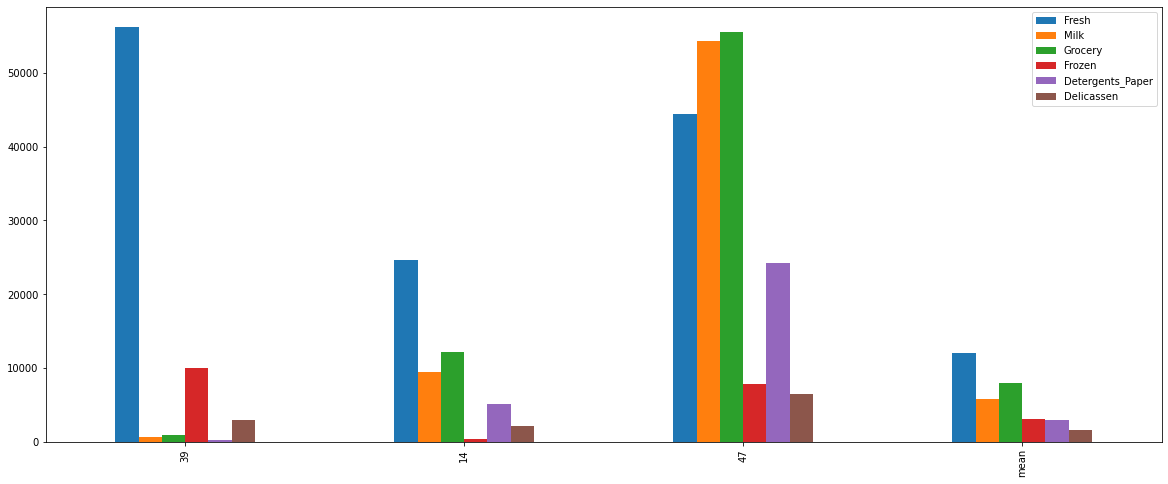

In [28]:
bar_of_samples.plot(kind = "bar", figsize =(20, 8))
plt.show()

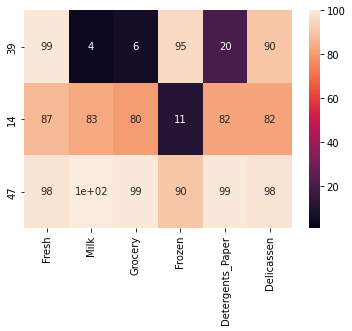

In [29]:
#Confusion Matrix
percentile = datasets.rank(pct=True)
percentile = 100* percentile.round(decimals=2)
percentile = percentile.iloc[choosenIndex]
sns.heatmap(percentile, vmin=1, vmax=100, annot=True)
plt.show()

In [30]:
datasets.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [37]:
datasets_columns = list(datasets.columns)
print("Feature Information : \n\nFeature Name: {}\nTotal Feature: {}".format(datasets_columns, len(datasets_columns)))
best_feature = []
modelScores = []
for eachFeature in datasets_columns:
    updatedDatasets = datasets.drop(eachFeature, axis = 1)#x data
    updatedFeatureData = pd.DataFrame(datasets.loc[:, eachFeature])#yData
    
    x_train, x_test, y_train, y_test = train_test_split(updatedDatasets, 
                                                        updatedFeatureData,
                                                       test_size=0.2, 
                                                       random_state=42)
    
    decisionTreeModel = DecisionTreeRegressor(random_state=42)
    decisionTreeModel.fit(x_train, y_train)
    modelScore = round(decisionTreeModel.score(x_test, y_test), 2)
    if modelScore >=0.60:
        modelScores.append(modelScore)
        best_feature.append(eachFeature)
    print("\nFeature : {}\nR2 Score: {}%".format(eachFeature, modelScore))

print("\n\nBest Total Feature is :{}".format(len(best_feature)))  
for eachBestFeature in range(len(best_feature)):
    print("\nFeature is :{}\nScore is :{}%".format(best_feature[eachBestFeature], modelScores[eachBestFeature]))

Feature Information : 

Feature Name: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
Total Feature: 6

Feature : Fresh
R2 Score: -0.44%

Feature : Milk
R2 Score: 0.27%

Feature : Grocery
R2 Score: 0.64%

Feature : Frozen
R2 Score: -0.39%

Feature : Detergents_Paper
R2 Score: 0.6%

Feature : Delicassen
R2 Score: -2.91%


Best Total Feature is :2

Feature is :Grocery
Score is :0.64%

Feature is :Detergents_Paper
Score is :0.6%
